In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_excel("INPUT SET 2.xlsx")

In [3]:
# splitting the remaining data in training data and validation data. 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, shuffle = False)

In [4]:
# Scaling the data using MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(["Year4"],axis=1).values)
Y_train = scaler.fit_transform(df_train["Year4"].values.reshape(-1,1))
X_test = scaler.fit_transform(df_test.drop(["Year4"],axis=1).values)
Y_test = scaler.fit_transform(df_test["Year4"].values.reshape(-1,1))

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(940, 3)
(940, 1)
(404, 3)
(404, 1)


In [6]:
# function to denormalise the predicted values.
def denormalize(df,norm_data):
    df = df["Year4"].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    
    return new

In [7]:
# defining weights and biases for the nn layers.

input_features = 3

W_1 = tf.Variable(tf.random_uniform([input_features,4])) # weights corresponding to first hidden/input layer.
b_1 = tf.Variable(tf.zeros([4]))

W_2 = tf.Variable(tf.random_uniform([4,4])) # weights corresponding to second hidden layer.
b_2 = tf.Variable(tf.zeros([4]))

W_O = tf.Variable(tf.random_uniform([4,1])) # weights corresponding to the output layer
b_O = tf.Variable(tf.zeros([1]))

In [8]:
def neural_net_model(X_data):
    
    # layer1 = relu(X_data.W_1 + b_1)
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    
    # layer2 = relu(layer1.W_2 + b_2)
    layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)
    
    # output = layer2.W_O + b_O
    output = tf.add(tf.matmul(layer_2,W_O), b_O)
    
    return output

In [9]:
x_data = tf.placeholder("float")
y_target = tf.placeholder("float")

In [10]:
# y_predicted stores the predicted value.
y_predicted = neural_net_model(x_data)

In [11]:
# loss function = MSE (Mean Square Error)
cost = tf.reduce_mean(tf.square(y_predicted-y_target))

In [12]:
# Using Gradient Descent as the optimization algorithm.
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [13]:
train_loss = []
test_loss = [] 
batch_size =  300

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Loop for training the ANN regression model.

for i in range(60):
        
    train_indices = np.random.choice(len(X_train), batch_size, replace=False)
    x = X_train[train_indices]
    y = Y_train[train_indices]
        
    for j in range(x.shape[0]):
        
        sess.run([cost,train],feed_dict={x_data:x[j,:].reshape(1,3), y_target:y[j].reshape(1,1)})
            
    train_loss.append(sess.run(cost, feed_dict={x_data:X_train,y_target:Y_train}))
    test_loss.append(sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))
    print('Epoch :',i,'Training Cost :',train_loss[i])
        
# end of for loop for training the model. 

print('Test Data Cost :',sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))

Epoch : 0 Training Cost : 0.014300448
Epoch : 1 Training Cost : 0.012269895
Epoch : 2 Training Cost : 0.012977943
Epoch : 3 Training Cost : 0.011928612
Epoch : 4 Training Cost : 0.012067568
Epoch : 5 Training Cost : 0.011813017
Epoch : 6 Training Cost : 0.01175979
Epoch : 7 Training Cost : 0.011612866
Epoch : 8 Training Cost : 0.01141704
Epoch : 9 Training Cost : 0.012135471
Epoch : 10 Training Cost : 0.011476534
Epoch : 11 Training Cost : 0.013232746
Epoch : 12 Training Cost : 0.011572438
Epoch : 13 Training Cost : 0.011430418
Epoch : 14 Training Cost : 0.012955052
Epoch : 15 Training Cost : 0.011439629
Epoch : 16 Training Cost : 0.011679674
Epoch : 17 Training Cost : 0.011362732
Epoch : 18 Training Cost : 0.011844753
Epoch : 19 Training Cost : 0.011469629
Epoch : 20 Training Cost : 0.01138469
Epoch : 21 Training Cost : 0.01246289
Epoch : 22 Training Cost : 0.012227769
Epoch : 23 Training Cost : 0.011449305
Epoch : 24 Training Cost : 0.011631979
Epoch : 25 Training Cost : 0.011898372


In [15]:
# stores the predicted value for test data using trained ANN model.
pred = sess.run(y_predicted, feed_dict={x_data:X_test}) # output comes between 0 to 1.

In [16]:
# denormalizing our predicted value.
y_test = denormalize(df_test, Y_test)
pred = denormalize(df_test, pred)

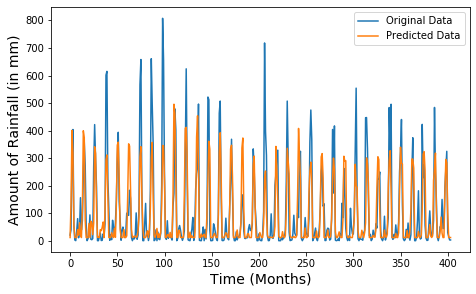

In [17]:
# plot showing difference between actual test data and predicted test data
plt.figure(figsize=[5*1.5,3*1.5])
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall (in mm)', fontsize="14")
plt.xlabel('Time (Months)', fontsize="14")
plt.show()

In [116]:
print("MAE : ", np.mean(abs(y_test-pred)))

MAE :  60.948114453683985


In [117]:
print("RMSE : ", np.sqrt(np.mean(np.square(y_test-pred))))

RMSE :  98.53394355506867


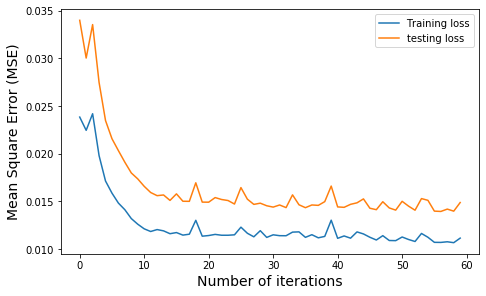

In [118]:
plt.figure(figsize=[5*1.5,3*1.5])
plt.plot(range(len(train_loss)),train_loss,label="Training loss")
plt.plot(range(len(test_loss)),test_loss,label="testing loss")
plt.legend(loc='best')
plt.ylabel('Mean Square Error (MSE)', fontsize="14")
plt.xlabel('Number of iterations', fontsize="14")
plt.show()